In [1]:
import pandas as pd
import numpy as np
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(500)
Corpus = pd.read_csv(R'E:\MS_2nd Semester\NLP\My_effort\dataset\BBC News.csv',encoding='latin-1')
Corpus.head()

,category,text,text_original,text_final
0,tech,"['tv', 'future', 'in', 'the', 'hands', 'of', '...",tv future in the hands of viewers with home th...,"['tv', 'future', 'hand', 'viewer', 'home', 'th..."
1,business,"['worldcom', 'boss', 'left', 'books', 'alone',...",worldcom boss left books alone former worldc...,"['worldcom', 'bos', 'leave', 'book', 'alone', ..."
2,sport,"['tigers', 'wary', 'of', 'farrell', 'gamble', ...",tigers wary of farrell gamble leicester say ...,"['tiger', 'wary', 'farrell', 'gamble', 'leices..."
3,sport,"['yeading', 'face', 'newcastle', 'in', 'fa', '...",yeading face newcastle in fa cup premiership s...,"['yeading', 'face', 'newcastle', 'fa', 'cup', ..."
4,entertainment,"['ocean', 's', 'twelve', 'raids', 'box', 'offi...",ocean s twelve raids box office ocean s twelve...,"['ocean', 'twelve', 'raid', 'box', 'office', '..."


In [3]:
Corpus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category       2225 non-null   object
 1   text           2225 non-null   object
 2   text_original  2225 non-null   object
 3   text_final     2225 non-null   object
dtypes: object(4)
memory usage: 69.7+ KB


C:\Users\HP\anaconda3\envs\gpu_test\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'CountPlot')

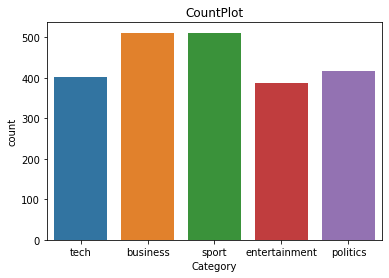

In [4]:
sns.countplot(Corpus.category)
plt.xlabel('Category')
plt.title('CountPlot')

In [5]:
Corpus.drop(['text','text_final'],axis=1,inplace=True)

In [6]:
Corpus.head()

,category,text_original
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [7]:
Corpus.rename(columns = {'text_original':'text'}, inplace = True)

In [8]:
Corpus.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [9]:
Corpus['text_original'] = Corpus['text']

In [10]:
# lower case the text of complete column 
Corpus['text'] = [entry.lower() for entry in Corpus['text']]

In [11]:
# 3. Tokenization-In this each entry in the corpus will be broken into set of words
Corpus['text']= [word_tokenize(entry) for entry in Corpus['text']]

In [12]:
Corpus['text']

0       [tv, future, in, the, hands, of, viewers, with...
1       [worldcom, boss, left, books, alone, former, w...
2       [tigers, wary, of, farrell, gamble, leicester,...
3       [yeading, face, newcastle, in, fa, cup, premie...
4       [ocean, s, twelve, raids, box, office, ocean, ...
                              ...                        
2220    [cars, pull, down, us, retail, figures, us, re...
2221    [kilroy, unveils, immigration, policy, ex-chat...
2222    [rem, announce, new, glasgow, concert, us, ban...
2223    [how, political, squabbles, snowball, it, s, b...
2224    [souness, delight, at, euro, progress, boss, g...
Name: text, Length: 2225, dtype: object

In [13]:
for index,entry in enumerate(Corpus['text']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []
    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(entry):
        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word)
            Final_words.append(word_Final)
    # The final processed set of words for each iteration will be stored in 'text_final'
    Corpus.loc[index,'text_final'] = str(Final_words)

In [14]:
import string
punc=string.punctuation
print(punc)


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [102]:
# # Define the function to remove the punctuation
# def remove_punctuations(text):
#     for punctuation in string.punctuation:
#         text = text.replace(punctuation, '')
#     return text
# # Apply to the DF series
# Corpus['text___final'] = Corpus['text_final'].apply(remove_punctuations)


In [103]:
Corpus.head()

,category,text,text_original,text_final,text___final
0,tech,"[tv, future, in, the, hands, of, viewers, with...",tv future in the hands of viewers with home th...,"['tv', 'future', 'hand', 'viewer', 'home', 'th...",tv future hand viewer home theatre system plas...
1,business,"[worldcom, boss, left, books, alone, former, w...",worldcom boss left books alone former worldc...,"['worldcom', 'bos', 'left', 'book', 'alone', '...",worldcom bos left book alone former worldcom b...
2,sport,"[tigers, wary, of, farrell, gamble, leicester,...",tigers wary of farrell gamble leicester say ...,"['tiger', 'wary', 'farrell', 'gamble', 'leices...",tiger wary farrell gamble leicester say rushed...
3,sport,"[yeading, face, newcastle, in, fa, cup, premie...",yeading face newcastle in fa cup premiership s...,"['yeading', 'face', 'newcastle', 'fa', 'cup', ...",yeading face newcastle fa cup premiership side...
4,entertainment,"[ocean, s, twelve, raids, box, office, ocean, ...",ocean s twelve raids box office ocean s twelve...,"['ocean', 'twelve', 'raid', 'box', 'office', '...",ocean twelve raid box office ocean twelve crim...


In [17]:
Corpus.text[3]

['yeading',
 'face',
 'newcastle',
 'in',
 'fa',
 'cup',
 'premiership',
 'side',
 'newcastle',
 'united',
 'face',
 'a',
 'trip',
 'to',
 'ryman',
 'premier',
 'league',
 'leaders',
 'yeading',
 'in',
 'the',
 'fa',
 'cup',
 'third',
 'round',
 '.',
 'the',
 'game',
 '-',
 'arguably',
 'the',
 'highlight',
 'of',
 'the',
 'draw',
 '-',
 'is',
 'a',
 'potential',
 'money-spinner',
 'for',
 'non-league',
 'yeading',
 'who',
 'beat',
 'slough',
 'in',
 'the',
 'second',
 'round',
 '.',
 'conference',
 'side',
 'exeter',
 'city',
 'who',
 'knocked',
 'out',
 'doncaster',
 'on',
 'saturday',
 'will',
 'travel',
 'to',
 'old',
 'trafford',
 'to',
 'meet',
 'holders',
 'manchester',
 'united',
 'in',
 'january',
 '.',
 'arsenal',
 'were',
 'drawn',
 'at',
 'home',
 'to',
 'stoke',
 'and',
 'chelsea',
 'will',
 'play',
 'host',
 'to',
 'scunthorpe',
 '.',
 'the',
 'only',
 'other',
 'non-league',
 'side',
 'in',
 'the',
 'draw',
 'are',
 'hinckley',
 'united',
 'who',
 'held',
 'brentford',
 

In [18]:
Corpus.text_final[3]

"['yeading', 'face', 'newcastle', 'fa', 'cup', 'premiership', 'side', 'newcastle', 'united', 'face', 'trip', 'ryman', 'premier', 'league', 'leader', 'yeading', 'fa', 'cup', 'third', 'round', 'game', 'arguably', 'highlight', 'draw', 'potential', 'yeading', 'beat', 'slough', 'second', 'round', 'conference', 'side', 'exeter', 'city', 'knocked', 'doncaster', 'saturday', 'travel', 'old', 'trafford', 'meet', 'holder', 'manchester', 'united', 'january', 'arsenal', 'drawn', 'home', 'stoke', 'chelsea', 'play', 'host', 'scunthorpe', 'side', 'draw', 'hinckley', 'united', 'held', 'brentford', 'goalless', 'draw', 'sunday', 'meet', 'league', 'one', 'leader', 'luton', 'win', 'replay', 'martin', 'allen', 'team', 'griffin', 'park', 'number', 'premiership', 'team', 'face', 'difficult', 'away', 'game', 'championship', 'side', 'weekend', 'january', 'everton', 'visit', 'plymouth', 'liverpool', 'travel', 'burnley', 'crystal', 'palace', 'go', 'sunderland', 'fulham', 'face', 'carling', 'cup', 'watford', 'bolt

In [83]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(Corpus['text_final'],Corpus['category'],test_size=0.3)

In [84]:
Corpus['text_final']

0       ['tv', 'future', 'hand', 'viewer', 'home', 'th...
1       ['worldcom', 'bos', 'left', 'book', 'alone', '...
2       ['tiger', 'wary', 'farrell', 'gamble', 'leices...
3       ['yeading', 'face', 'newcastle', 'fa', 'cup', ...
4       ['ocean', 'twelve', 'raid', 'box', 'office', '...
                              ...                        
2220    ['car', 'pull', 'u', 'retail', 'figure', 'u', ...
2221    ['kilroy', 'unveils', 'immigration', 'policy',...
2222    ['rem', 'announce', 'new', 'glasgow', 'concert...
2223    ['political', 'squabble', 'snowball', 'become'...
2224    ['souness', 'delight', 'euro', 'progress', 'bo...
Name: text_final, Length: 2225, dtype: object

In [85]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [86]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy.sparse.csr import csr_matrix #need this if you want to save tfidf_matrix

In [87]:
tf = TfidfVectorizer(analyzer='word', ngram_range=(1,6),max_features=5000,
                     min_df = 0, stop_words = 'english', sublinear_tf=True)
Train_X_Tfidf =  tf.fit_transform(Train_X)
Test_X_Tfidf =   tf.transform(Test_X)


In [88]:
#get feature names
feature_names = tf.get_feature_names()

In [89]:
feature_names

['aaa',
 'abandoned',
 'abc',
 'ability',
 'able',
 'abn',
 'abn amro',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abuse',
 'abused',
 'ac',
 'academic',
 'academy',
 'academy award',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accessible',
 'accident',
 'according',
 'according analyst',
 'according report',
 'account',
 'account deficit',
 'accounting',
 'accurate',
 'accused',
 'accused mr',
 'accusing',
 'achieve',
 'achieved',
 'achievement',
 'acknowledged',
 'acquire',
 'acquisition',
 'act',
 'acting',
 'action',
 'active',
 'activist',
 'activity',
 'actor',
 'actor jamie',
 'actor jamie foxx',
 'actor jamie foxx actress',
 'actress',
 'actress hilary',
 'actress hilary swank',
 'actually',
 'ad',
 'adam',
 'adapt',
 'adapted',
 'add',
 'added',
 'added mr',
 'adding',
 'addition',
 'additional',
 'address',
 'administration',
 'admits',
 'admitted',
 'adopt',
 'adopted',
 'adoption',
 'adriano',
 'adult',
 'advance',
 'advanced',
 'advantage',
 

### get idf values of all words of specific documents

In [90]:
#you the list of all the tokens or n-grams or words. For the first document in your corpus,
doc = 1
feature_index = Train_X_Tfidf[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [Train_X_Tfidf[doc, x] for x in feature_index])

In [91]:
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)

chief executive 0.06069936532777766
looking forward 0.09235656829240389
past year 0.0734657501038197
oil price 0.08063358749340344
north america 0.09434859582158224
peter 0.06844721644002712
executive 0.053226786607696204
chief 0.047993628399438444
table 0.08371713478246949
option 0.07409221751053773
firm 0.043472617567223704
selling 0.12599448694871695
lead 0.05551173254744785
level 0.05498807813979895
union 0.06174276930481925
dispute 0.08821088906363876
locked 0.09786033525395738
owned 0.08613735445495692
french 0.06532562034691963
future 0.05241046636072845
remains 0.06891060669440298
uncertainty 0.09144214634193916
competitive 0.0797191655429387
remain 0.06301980485088816
warned 0.06013081813610386
forecast 0.06867732456465216
forward 0.062210430978907945
looking 0.05540569654955752
worth 0.06938705189829862
share 0.0533199696878451
buy 0.06440119976402467
increasing 0.07409221751053773
boost 0.06386986749354784
managing 0.08210518361375409
company 0.04082083200490403
past 0.05360

### Get idf values of each word with all documents

In [92]:
df = pd.DataFrame(Train_X_Tfidf.toarray(), columns = tf.get_feature_names())
print(df)

      aaa  abandoned  abc  ability  able  abn  abn amro  abortion  abroad  \
0     0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
1     0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
2     0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
3     0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
4     0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
...   ...        ...  ...      ...   ...  ...       ...       ...     ...   
1552  0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
1553  0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
1554  0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
1555  0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   
1556  0.0        0.0  0.0      0.0   0.0  0.0       0.0       0.0     0.0   

      absence  ...  youth  yuan  yugansk  yuganskneftegas  yukos  yushchenk

In [93]:
Train_X_Tfidf.shape

(1557, 5000)

In [94]:
Test_X_Tfidf.shape

(668, 5000)

In [95]:
print(Train_X_Tfidf)

  (0, 2060)	0.08244383125904853
  (0, 4040)	0.08244383125904853
  (0, 3061)	0.08351344562013202
  (0, 660)	0.08351344562013202
  (0, 1083)	0.08144804411213055
  (0, 3971)	0.08051654744523154
  (0, 4039)	0.08244383125904853
  (0, 2889)	0.143356599707293
  (0, 1439)	0.0740752013894047
  (0, 4215)	0.07659167676140337
  (0, 3062)	0.13958954045081792
  (0, 2057)	0.14047094319812845
  (0, 2056)	0.186427951363718
  (0, 1082)	0.07527866390199996
  (0, 4888)	0.07097045821287436
  (0, 2109)	0.07881656264239884
  (0, 3749)	0.084668717140044
  (0, 2398)	0.07097045821287436
  (0, 4739)	0.04033109511626479
  (0, 3598)	0.08051654744523154
  (0, 3180)	0.07243950706659094
  (0, 969)	0.07729587441731811
  (0, 2238)	0.07193302741900794
  (0, 1023)	0.06143939572721537
  (0, 3937)	0.05574850758773836
  :	:
  (1556, 4512)	0.061118079015813793
  (1556, 4554)	0.04641610010167444
  (1556, 2749)	0.06531342987803354
  (1556, 740)	0.05764264578859981
  (1556, 1745)	0.07471770643028285
  (1556, 3310)	0.12463163734

In [96]:
print(len(Train_Y))

1557


In [97]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_NB = Naive.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, Test_Y)*100)

Naive Bayes Accuracy Score ->  97.45508982035929


In [98]:
print(classification_report(Test_Y, predictions_NB))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       157
           1       0.99      0.97      0.98        98
           2       0.97      0.94      0.95       118
           3       0.99      1.00      0.99       176
           4       0.97      0.97      0.97       119

    accuracy                           0.97       668
   macro avg       0.97      0.97      0.97       668
weighted avg       0.97      0.97      0.97       668



### Random Forest

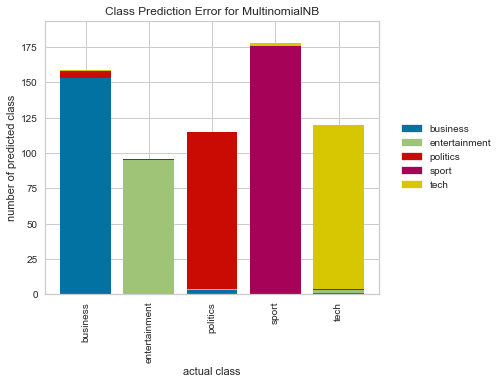

In [99]:
from sklearn.ensemble import RandomForestClassifier

from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    Naive, classes=Encoder.classes_
)

# Fit the training data to the visualizer
visualizer.fit(Train_X_Tfidf,Train_Y)

# Evaluate the model on the test data
visualizer.score(Test_X_Tfidf, Test_Y)

# Draw visualization
g = visualizer.poof()

### SVM

In [100]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  98.35329341317365


In [101]:
print(classification_report(Test_Y,predictions_SVM))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       157
           1       0.98      1.00      0.99        98
           2       0.98      0.94      0.96       118
           3       0.98      1.00      0.99       176
           4       0.98      0.99      0.99       119

    accuracy                           0.98       668
   macro avg       0.98      0.98      0.98       668
weighted avg       0.98      0.98      0.98       668



### BOW  Approach


In [139]:
### Uisng BOW Instaed of TFIDF
from sklearn.feature_extraction.text import CountVectorizer
 
vectorizer = CountVectorizer(analyzer='word', ngram_range=(1,6),max_features=5000,
                     min_df = 0, stop_words = 'english')

In [140]:
Train_X_Tfidf = vectorizer.fit_transform(Train_X)
Test_X_Tfidf = vectorizer.fit_transform(Test_X)
print(vectorizer.get_feature_names())

['aaa', 'abandoned', 'abc', 'ability', 'able', 'abroad', 'absence', 'absolutely', 'abuse', 'academy', 'academy award', 'accept', 'acceptance', 'accepted', 'access', 'accessible', 'accident', 'acclaimed', 'accompanied', 'according', 'according figure', 'according mr', 'according report', 'account', 'accounting', 'accurate', 'accuse', 'accused', 'achieve', 'achieved', 'achievement', 'acknowledged', 'acquisition', 'act', 'acting', 'action', 'active', 'activist', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'adam', 'adaptation', 'add', 'added', 'added mr', 'adding', 'addition', 'additional', 'address', 'adjusted', 'administration', 'administrator', 'admission', 'admits', 'admitted', 'adopted', 'adult', 'advance', 'advantage', 'adventure', 'advertising', 'advice', 'advisor', 'advisory', 'advocate', 'affair', 'affair spokesman', 'affect', 'affected', 'afford', 'affordable', 'africa', 'african', 'afternoon', 'age', 'aged', 'ageing', 'agency', 'agency said', 'agenda', 'agent', '

In [135]:
Train_X_Tfidf.shape

(1557, 5000)

In [136]:
Test_X_Tfidf.shape

(668, 5000)

In [123]:
# Select the first ten rows from the data set
td = pd.DataFrame(Train_X_Tfidf.todense()).iloc[:10]
td.columns=vectorizer.get_feature_names()


In [124]:
term_document_matrix = td.T
term_document_matrix

,0,1,2,3,4,5,6,7,8,9
aaa,0,0,0,0,0,0,0,0,0,0
aac,0,0,0,0,0,0,0,0,0,0
aadc,0,0,0,0,0,0,0,0,0,0
aaliyah,0,0,0,0,0,0,0,0,0,0
aaltra,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
zuluaga,0,0,0,0,0,0,0,0,0,0
zurich,0,0,0,0,0,0,0,0,0,0
zutons,0,0,0,0,0,0,0,0,0,0
zvonareva,0,0,0,0,0,0,0,0,0,0


In [126]:


term_document_matrix.columns = ['Docoment  '+str(i) for i in range(1, 11)]

In [127]:
term_document_matrix['total_count'] = term_document_matrix.sum(axis=1)

In [128]:
term_document_matrix['total_count']

aaa            0
aac            0
aadc           0
aaliyah        0
aaltra         0
              ..
zuluaga        0
zurich         0
zutons         0
zvonareva      0
zvyagintsev    0
Name: total_count, Length: 21010, dtype: int64

In [129]:
# Top 50 words 
term_document_matrix = term_document_matrix.sort_values(by ='total_count',ascending=False)[:50] 

In [130]:
# Print the first 100 rows 
print(term_document_matrix.drop(columns=['total_count']).head(100))

            Docoment  1  Docoment  2  Docoment  3  Docoment  4  Docoment  5  \
said                  8            2            5            3            4   
firm                  0            1            4            0            5   
consumer              0            0            0            0            0   
second                0            0            0           14            0   
also                  1            1            0            1            1   
would                 3            1            0            0            3   
eu                    0            0            0            0            0   
murder               13            0            0            0            0   
world                 0            0            0           10            0   
trade                 0            0            0            0            0   
nestle                0           12            0            0            0   
year                  1            2            0   

In [142]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,Train_Y)
# predict the labels on validation dataset
predictions_SVM = SVM.predict(Test_X_Tfidf)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Test_Y)*100)

SVM Accuracy Score ->  32.035928143712574
